# Pleiades Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import QTable, Table, Column

In [2]:
#Functions
def degree_converter(degree):
        decdegrees = degree
        hour = int(decdegrees)
        temp = 60 * (decdegrees - hour)
        minutes = int(temp)
        seconds = 60 * (temp - minutes)
        return hour, minutes, round(seconds,2)

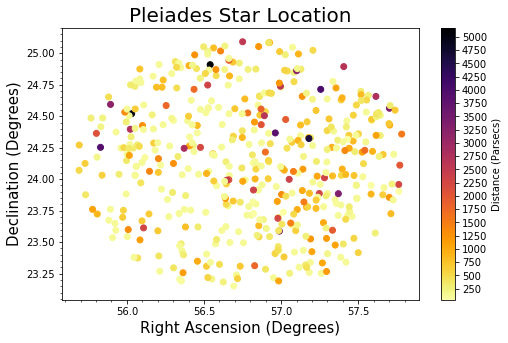

In [5]:
#Location on the Sky
Pleds_table = pd.read_csv("Pleiades_total.csv")

ra = Pleds_table.ra.values
dec = Pleds_table.dec.values
parallax = Pleds_table.parallax.values
mag = Pleds_table.phot_g_mean_mag.values
bp_rp = Pleds_table.bp_rp.values

distance = np.abs(parallax)/1000
colors = 1/distance

mag_final = []
bp_rp_final = []
ra_final = []
dec_final = []
ra_HMS = []
unusual = []
parsec = []
parsec_1 = []
dec_HMS = [] 
ticks = []
for j in range(1, 21):
       ticks.append(250*j)

for i in range(len(Pleds_table)):
    if colors[i] > 5250:
        unusual.append([i])
    else:
        parsec.append(colors[i])
        ra_final.append(ra[i])
        dec_final.append(dec[i])
        mag_final.append(mag[i])
        bp_rp_final.append(bp_rp[i])
        ra_HMS.append(degree_converter(ra[i]))
        dec_HMS.append(degree_converter(dec[i]))


plt.figure(figsize = [8,5])
plt.title('Pleiades Star Location', fontsize = 20)
plt.scatter(ra_final, dec_final, c = parsec, cmap = 'inferno_r')
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
cb.set_ticks(ticks)
plt.minorticks_on()
plt.xlabel('Right Ascension (Degrees)',fontsize = 15)
plt.ylabel('Declination (Degrees)',fontsize = 15)

plt.show()

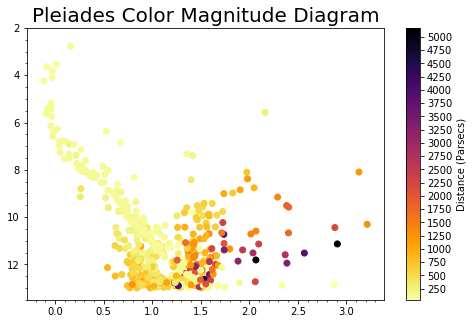

In [6]:
#Color Magnitude Diagram
plt.figure(figsize = [8,5])
plt.title('Pleiades Color Magnitude Diagram', fontsize = 20)
plt.scatter(bp_rp_final,mag_final,c =parsec, cmap = 'inferno_r')
cb = plt.colorbar(label = 'Distance (Parsecs)')
cb.set_ticks(ticks)
plt.minorticks_on()
plt.ylim(13.5,2)

plt.show()

In [11]:
#Making the Table
ra_d = []
ra_m = []
ra_s = []
dec_d = []
dec_m = []
dec_s = []

for i in range(len(Pleds_table)):
    #Converting ra degrees to Hrs, mins, sec
    d = int(ra[i])
    m = int((ra[i]-d)*60)
    s = round(((ra[i]-d-m/60)*60**2),2)
    
    ra_d.append(d)
    ra_m.append(m)
    ra_s.append(s)
    
    #Converting dec degrees to Hrs, mins, sec
    dd = int(dec[i])
    mm = int((dec[i]-dd)*60)
    ss = round(((dec[i]-dd-mm/60)*60**2),2)
    
    dec_d.append(dd)
    dec_m.append(mm)
    dec_s.append(ss)

HMS = {'Hours(ra)' : pd.Series(ra_d), 'Mins(ra)' : pd.Series(ra_m), 'Sec(ra)' : pd.Series(ra_s),
     'Hours(dec)' : pd.Series(dec_d), 'Mins(dec)' : pd.Series(dec_m), 'Sec(dec)' : pd.Series(dec_s)}

ra_dec_table = pd.DataFrame(HMS)
ra_dec_table

,Hours(ra),Mins(ra),Sec(ra),Hours(dec),Mins(dec),Sec(dec)
0,56,26,23.24,24,59,14.91
1,56,33,44.80,25,2,32.30
2,56,32,24.82,24,54,33.48
3,56,36,28.10,25,1,4.70
4,56,38,7.80,25,3,28.26
...,...,...,...,...,...,...
484,55,48,9.77,24,21,50.74
485,55,46,4.23,24,29,8.44
486,56,5,28.95,24,46,5.57
487,55,55,48.95,24,22,27.82


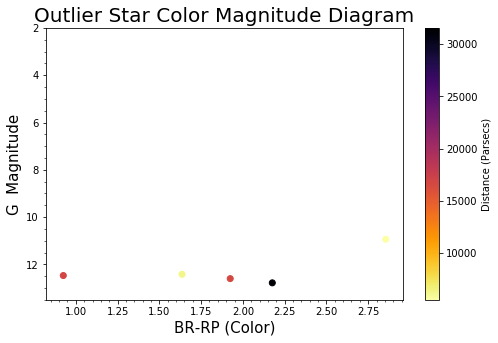

In [8]:
#Outlier Stars
unusual
unusual_ids = [47,237,300,322,361]
Pleds_table['parallax'][unusual_ids]
#Parallax values close to zero less than 1 are much further away
#than any other stars in or nearby the Pleiades star cluster
#these outlier values skew the other data points, yet I didn't want
#to exclude them, so I graphed these stars individually below

u_distance = np.abs(Pleds_table['parallax'][unusual_ids].values)/1000
u_colors = 1/u_distance
u_ticks = []

for j in range(1, 121):
       u_ticks.append(250*j)

plt.figure(figsize = [8,5])
plt.title('Outlier Star Color Magnitude Diagram', fontsize = 20)
plt.scatter(Pleds_table['bp_rp'][unusual_ids].values, Pleds_table['phot_g_mean_mag'][unusual_ids].values,\
            c = u_colors, cmap = 'inferno_r')
cb_u = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
cb.set_ticks(u_ticks)
plt.ylim(13.5,2)
plt.minorticks_on()
plt.ylabel('G  Magnitude',fontsize = 15)
plt.xlabel('BR-RP (Color)',fontsize = 15)

plt.show()

In [9]:
unusual
unusual_ids = [47,237,300,322,361]
Pleds_table['parallax'][unusual_ids]

47     0.159433
237   -0.031686
300    0.182269
322    0.059956
361   -0.059478
Name: parallax, dtype: float64

In [10]:
Pleds_table

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
0,69821397842415872,56.439790,0.037248,24.987475,0.022743,0.791403,0.037672,11.352838,1.402733,23.416765,0.291127,NOT_AVAILABLE,4628.6070,0.3535
1,69842494721757440,56.562444,0.038973,25.042304,0.022290,1.244317,0.043370,12.826834,0.964838,6.969342,1.867292,NOT_AVAILABLE,5359.0000,NaN
2,69816965436241280,56.540228,0.104306,24.909301,0.065169,0.193493,0.112639,11.135774,2.907622,-30.430960,0.444136,NOT_AVAILABLE,3374.0000,1.8200
3,69841429569956224,56.607805,0.045475,25.017972,0.027688,0.707153,0.050627,9.153901,2.291766,33.138608,0.300386,NOT_AVAILABLE,3766.7000,NaN
4,69842013685507072,56.635500,0.054541,25.057849,0.026222,4.252819,0.059406,12.649022,1.164585,74.160283,1.371833,NOT_AVAILABLE,4944.5000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,68270811569372288,55.802714,0.040228,24.364096,0.023272,0.475342,0.045561,12.830411,1.552081,38.712592,0.646638,NOT_AVAILABLE,4402.2603,0.7300
485,68298883475605760,55.767841,0.041935,24.485679,0.025176,3.400231,0.047833,12.115851,0.954138,33.355031,2.158405,NOT_AVAILABLE,5368.0000,0.4593
486,68310359628169472,56.091374,0.051550,24.768213,0.026949,7.342111,0.054681,12.572007,1.411889,7.884503,7.419732,NOT_AVAILABLE,4573.0000,0.1190
487,68293729514855040,55.930264,0.057242,24.374396,0.035589,7.226433,0.062889,8.186488,0.352915,NaN,NaN,NOT_AVAILABLE,7963.1953,0.5238
